# Face Database Creation
This code captures 30 images of a person's face using a webcam and saves them as a dataset for face recognition. It uses the Haar Cascade classifier to detect faces in each image and crops and resizes the detected face before saving it to a specified directory. The captured images are resized to a fixed width and height to ensure uniformity. The code also displays each image with the detected face surrounded by a green rectangle for visual verification of the detected face.

The dimensions of the captured images are set to 130x100 pixels. The captured images are displayed on the screen with a green rectangle around the detected face. The user can press the Esc key to stop the image capture process.

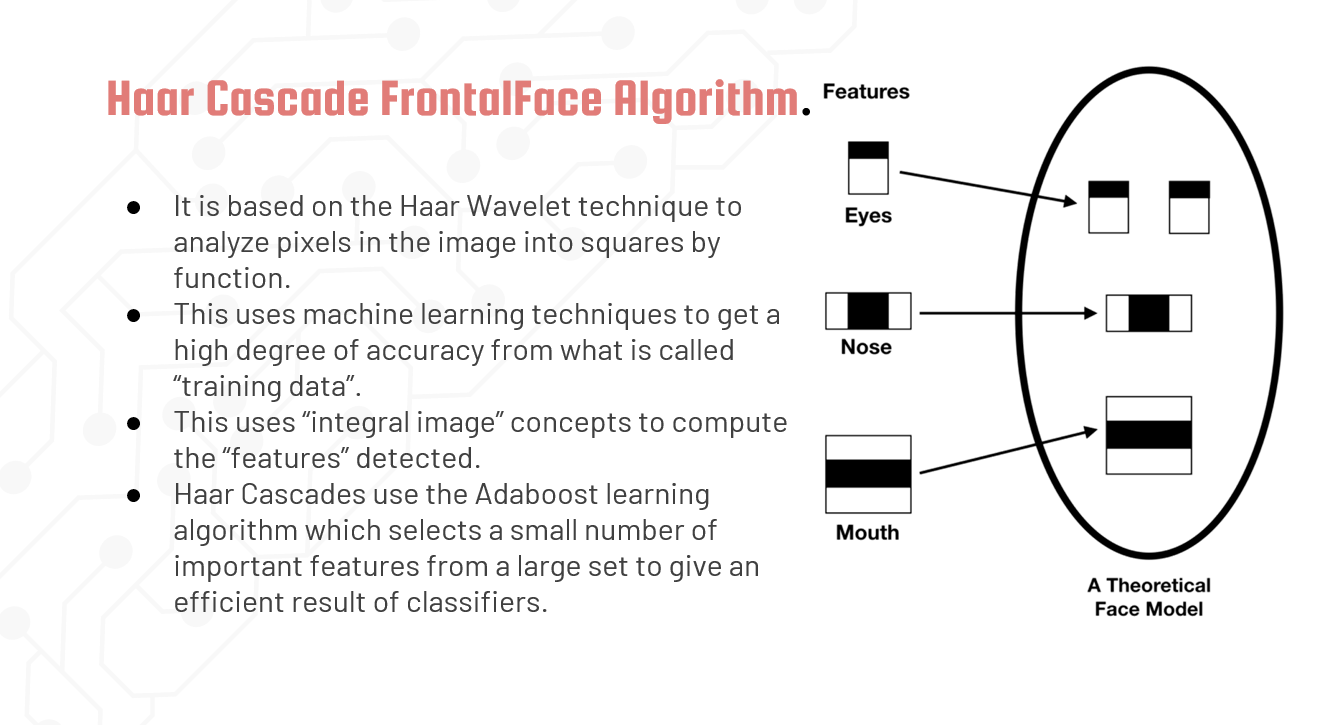

Flowchart:
```
Start
|
|__ Create a directory to store the captured images
|__ Set the dimensions for the captured images
|__ Load the Haar cascade classifier for face detection
|__ Open the camera
|__ Loop 30 times to capture images
|     |
|     |__ Capture an image from the camera
|     |__ Convert the image to grayscale
|     |__ Detect faces in the image using the Haar cascade classifier
|     |__ Loop over each face detected in the image
|     |     |
|     |     |__ Draw a rectangle around the face
|     |     |__ Crop the face from the image
|     |     |__ Resize the face image to the specified dimensions
|     |     |__ Create a filename for the captured image
|     |     |__ Save the resized face image to disk
|     |__ Display the image with the detected face
|     |__ Wait for the user to press a key
|     |__ If the user presses the Esc key, exit the loop
|__ Release the camera
|__ Close all windows
|__ Print a success message
|
End

```

In [ ]:
# Import Necessary Libraries
import cv2
import os

In [ ]:
# Directory
dataset = "data"
name = "snapd"
path = os.path.join(dataset, name)

In [ ]:
# Create the directory for the dataset if it doesn't exist
try:
    os.makedirs(path)
except FileExistsError:
    pass

In [ ]:
# Set the dimensions for the captured images
(width, height) = (130, 100)

# Load the Haar cascade classifier for face detection
alg = "haarcascade_frontalface_default.xml"
haar_cascade = cv2.CascadeClassifier(alg)

In [ ]:
# Open the camera
cam = cv2.VideoCapture(0)

# Capture 30 images of the user's face
for i in range(30):
    # Capture an image from the camera
    _, img = cam.read()

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = haar_cascade.detectMultiScale(gray, 1.3, 4)

    # Loop over each face detected in the image
    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Crop the face from the image
        face_only = gray[y:y + h, x:x + w]

        # Resize the face image to the specified dimensions
        resize_img = cv2.resize(face_only, (width, height))

        # Create a filename for the captured image
        file_name = f"{name}_{i}.jpg"

        # Save the resized face image to disk
        cv2.imwrite(os.path.join(path, file_name), resize_img)

    # Display the image with the detected face
    cv2.imshow("Face Detection", img)

    # Wait for the user to press a key
    key = cv2.waitKey(10)

    # If the user presses the Esc key, exit the loop
    if key == 27:
        break

In [ ]:
# Release the camera
cam.release()

# Close all windows
cv2.destroyAllWindows()

print("Images captured successfully")

Images captured successfully
